### 準備

このプログラムではグラフ表示のために **graphviz** というツールを使っていますので、実行に先立って graphviz を使えるようにするための作業が必要です。その内容は、「[Windows10 で Graphviz を使うための設定](http://localhost:8888/notebooks/ML02%20%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AE%E5%AD%A6%E7%BF%92/Windows10%20%E3%81%A6%E3%82%99%20Graphviz%20%E3%82%92%E4%BD%BF%E3%81%86%E3%81%9F%E3%82%81%E3%81%AE%E8%A8%AD%E5%AE%9A.ipynb)」に書いてありますので、先にそちらを済ませて下さい。


In [1]:
# !pip install graphviz  
# !pip install pydotplus 

In [1]:
# モジュールのインポート
import pandas as pd
from sklearn import tree
from sklearn.externals.six import StringIO
from graphviz import Digraph
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  PIL import Image,ImageDraw,ImageFont
import numpy as np
from IPython.display import display

# FONTPATH = "C:\\Windows\\Fonts\HGRSMP.TTF"  # for Windows
# FONTPATH = '/Library/Fonts/SFNSText.ttf'  # for Macintosh

# 識別対象データ

In [79]:
faces=np.array([
    # ５つの成分の意味
    # 第0成分: 性別　　０:男性、1:女性
    # 第1成分: 年齢 0:未成年、1:成年、2:老人
    # 第2成分: 薬物　　０:シンナー、1:大麻　　２：覚せい剤
    # 第3成分: 犯罪歴　0:なし、1:あり
    # 第4成分: 実刑の有無　　0:なし、1:あり
    [26,0,0,"D"],
    [26,0,1,"A"],
    [27,1,1,"A"],
    [27,1,0,"D"],
    [28,0,0,"D"],
    [28,1,0,"A"],
    [29,0,1,"A"],
    [29,1,1,"A"]
    ])

items1=['年度','コース','性別']
items2=['合否','判定結果']
dummy=np.array([None]*8)
ｄｆ = pd.DataFrame(np.c_[faces,dummy],columns=np.r_[items1,items2])
ｄｆ

,年度,コース,性別,合否,判定結果
0,26,0,0,D,None
1,26,0,1,A,None
2,27,1,1,A,None
3,27,1,0,D,None
4,28,0,0,D,None
5,28,1,0,A,None
6,29,0,1,A,None
7,29,1,1,A,None


# 決定木の生成プログラム

# 決定木の準備

In [80]:
classifier = tree.DecisionTreeClassifier(criterion='entropy') # default の criterion は gini

# 訓練データをもとに決定木を構成する


In [81]:
classifier.fit(ｄｆ[items1],ｄｆ['合否']);

# 完成した決定木をpng画像として出力

In [82]:
dot_data = StringIO() # 仮想テキストファイル
tree.export_graphviz(classifier, out_file=dot_data) # 決定木の描画用データ dot_data を生成する
dot_text = dot_data.getvalue() # dot_data を文字列として取り出し， X[_] を表見出しに使っている言葉で置換

上のプログラムは生成された決定木をグラフ記述言語 Dot　による記述に変換するプログラムである。  
その記述は分岐基準が X[0]、X[1]という風に記号化されているので、それを言葉に置き換える。

In [83]:
for i in range(len(items1)):
    dot_text = dot_text.replace('X[{}]'.format(i),items1[i])
dot_text

'digraph Tree {\nnode [shape=box] ;\n0 [label="性別 <= 0.5\\nentropy = 0.954\\nsamples = 8\\nvalue = [5, 3]"] ;\n1 [label="コース <= 0.5\\nentropy = 0.811\\nsamples = 4\\nvalue = [1, 3]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n1 -> 2 ;\n3 [label="年度 <= 27.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

上に表示されているのがDot 記述である。インデントをつけて清書するともう少し分かりやすくなるが、それでもごちゃごちゃしているので Graphviz を使ってダイアグラム化する。

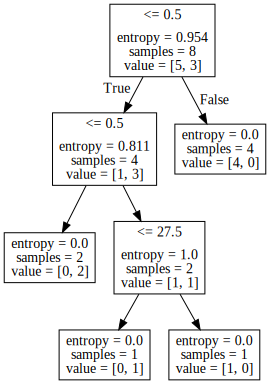

In [84]:
from graphviz import Source
src = Source(dot_text)
src.format="png"
src.render("fyakubutsu.png")
src

薬物は3種あるが、**tree.DecisionTreeClassifier** は2分木しかつくれないので、薬物の部分は 1.5 以下と 1.5 以上という分岐になっている。項目は 0,1,2 なので、0 or 1 と 2 つまり、（シンナーと大麻）か（覚醒剤）かという分岐を意味する。

# 全判定結果

In [60]:
ｄｆ['判定結果']=classifier.predict(ｄｆ[items1])
ｄｆ

,年度,コース,性別,合否,判定結果
0,27,0,0,D,D
1,27,0,1,A,A
2,27,1,1,A,A
3,29,1,0,D,A
4,29,0,0,D,D
5,29,1,0,A,A
6,28,0,1,A,A
7,29,1,1,A,A


In [23]:
print("正解率 {:3.2f}　％".format((ｄｆ['合否'] != ｄｆ['判定結果']).value_counts()[False]*100/8))

正解率 100.00　％


In [36]:
faces=np.array([
    # ５つの成分の意味
    # 第0成分: 性別　　０:男性、1:女性
    # 第1成分: 年齢 0:未成年、1:成年、2:老人
    # 第2成分: 薬物　　０:シンナー、1:大麻　　２：覚せい剤
    # 第3成分: 犯罪歴　0:なし、1:あり
    # 第4成分: 実刑の有無　　0:なし、1:あり
    [0,27,0,"D"],
    [0,27,1,"A"],
    [1,27,1,"A"],
    [1,27,0,"D"],
    [0,28,0,"D"],
    [1,28,0,"A"],
    [0,28,1,"A"],
    [1,28,1,"A"]
    ])

items1=['年度','コース','性別']
items2=['合否','判定結果']
dummy=np.array([None]*8)
ｄｆ = pd.DataFrame(np.c_[faces,dummy],columns=np.r_[items1,items2])
ｄｆ

,年度,コース,性別,合否,判定結果
0,0,27,0,D,None
1,0,27,1,A,None
2,1,27,1,A,None
3,1,27,0,D,None
4,0,28,0,D,None
5,1,28,0,A,None
6,0,28,1,A,None
7,1,28,1,A,None
